# 📈 Linear Regression

### 📓 Definition

Linear regression is a type of statistical analysis used to predict the relationship between two variables. It assumes a linear relationship between the independent variable and the dependent variable, and aims to find the best-fitting line that describes the relationship. The line is determined by minimizing the sum of the squared differences between the predicted values and the actual values.

## 🧹 Data Pre-Processing Phase

### 📓 Definition

Data preprocessing refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis.

### 🔹 What we will do in this section?

- Importing the basic libraries.
- Importing the dataset directly from **<a href="https://github.com/rikisupriyo/end-to-end-ml/tree/main/DATASETS">here</a>**.
- Checking if the dataset got any missing values or not.
- Seperating the dependent and independent variables from the dataset.
- OneHotEncoding the **State** column from the dataset.
- Splitting the dataset into training and testing set.
- Feature Scaling the dataset using Standardization/Normalization.

In [86]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
# Importing the dataset

dataset = pd.read_csv('https://raw.githubusercontent.com/rikisupriyo/end-to-end-ml/main/DATASETS/REGRESSION/startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [88]:
# Checking the datatype of each columns 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [89]:
# Checking the number of states in our dataset

dataset['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [90]:
# Checking if there are any missing values in the dataset we need to replace

dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [91]:
# Seperating the dependent and independent variables into X and y respectively

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Checking the shape of X and y

print(f'Shape of X: {X.shape}\nShape of y: {y.shape}')

Shape of X: (50, 4)
Shape of y: (50,)


In [92]:
# Onehotencoding the column containing the states 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(transformer.fit_transform(X))

### 🔑 Important Note:

When we use OneHotEncode on a specific column, the encoded column comes get split into the same amount of columns as the value count of that column and as you can see, it also appears infront of the dataset. In our case the **State** column got seperated into 3 columns because our value count for this column is 3. Here the most important thing we need to do is omit one of the columns we got from OneHotEncoding to avoid the **Dummy Variable** trap and not ending up with correlated features. It is a very good practice to do so. If we got **k** columns from the encoding, we must use only **k-1** columns.

In [93]:
# Printing the first 5 rows from X

print(X[:5])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


In [94]:
# dropping the first column to avoid dummy variable trap

X = X[:, 1:]
print(X[:5])

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]]


In [95]:
# Splitting the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f'Shape of X_train: {X_train.shape}\nShape of y_train: {y_train.shape}\nShape of X_test: {X_test.shape}\nShape of y_test: {y_test.shape}')

Shape of X_train: (40, 5)
Shape of y_train: (40,)
Shape of X_test: (10, 5)
Shape of y_test: (10,)


### 🔑 Important Note:

We should always feature scale our data only after splitting our data into training and testing set because if we apply it before the split then it will actually get the mean and the standard deviation of all the values, including the ones in the test set. Since the test set is something we are supposed to have like some future data in production, applying feature scaling on the original data set, before the split would cause some information leakage on the test set. That's why it's a very good practice.

In [96]:
# Standardscaling the data to avoid large gaps between each numbers

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[:, 2:] = scaler.fit_transform(X_train[:, 2:])
X_test[:, 2:] = scaler.transform(X_test[:, 2:])

# Printing the first 5 rows of the Standardized dataset

print(X_test[:5])

[[1.0 0.0 -0.12149520306216502 2.2889053032012234 -0.6803228661410794]
 [0.0 0.0 0.6280306007656555 -1.2206949887864658 0.38557773677354845]
 [1.0 0.0 0.6549006077802048 -0.49434194923946795 0.21885524294941494]
 [1.0 0.0 -0.947621483893497 -1.494179356244993 -0.30512103616996794]
 [1.0 0.0 1.770481112122021 -0.8593266741758989 1.666880795073106]]


## 🤖 Linear Regression

### 🔹 What we will do in this section?

- Importing and training the Linear Regression Model.
- Predicting on both training and testing set with our trained model.

In [97]:
# Training the Linear Regression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [98]:
# Predicting on the training set

y_pred_train = model.predict(X_train)
print(f'Train Set Predictions: {y_pred_train[:3]}')

# Predicting on the testing set

y_pred_test = model.predict(X_test)
print(f'Test Set Predictions: {y_pred_test[:3]}')

Train Set Predictions: [ 95764.42320496  89164.62849777 109506.72329085]
Test Set Predictions: [103015.20159796 132582.27760816 132447.73845174]


## 📊 Visualization and Evaluation of our Model

### 🔹 What we will do in this section?

- Plotting y_train against y_pred_train.
- Plotting y_test against y_pred_test.
- Evaluating our model's R-Squared Score.

[]

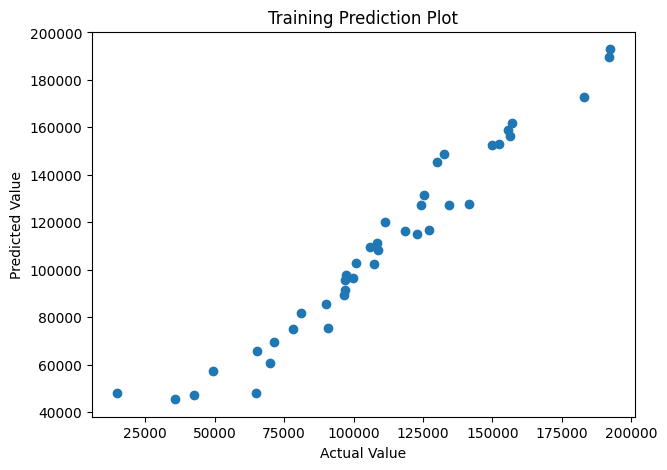

In [99]:
# Plotting the Training Set

plt.figure(figsize = (7, 5))
plt.scatter(y_train, y_pred_train)
plt.title('Training Prediction Plot')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.plot()

[]

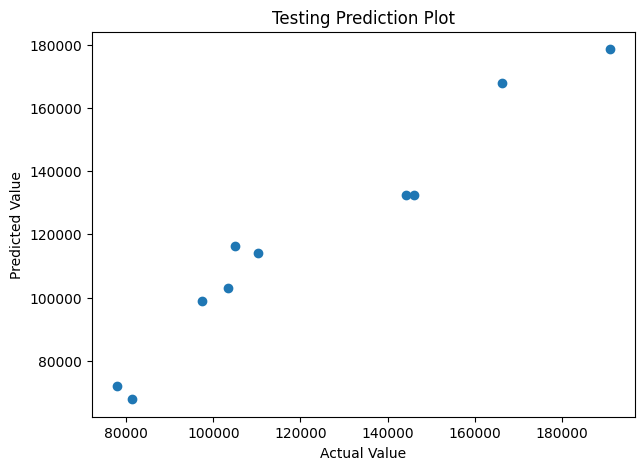

In [100]:
# Plotting the Training Set

plt.figure(figsize = (7, 5))
plt.scatter(y_test, y_pred_test)
plt.title('Testing Prediction Plot')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.plot()

In [101]:
# Checking the R-Squared score of our model

from sklearn.metrics import r2_score

# R-Squared score for our training set

print(f'R-Squared Score of Training Set: {r2_score(y_train, y_pred_train) * 100:.2f} %')

# R-Squared score for our testing set

print(f'R-Squared Score of Testing Set: {r2_score(y_test, y_pred_test) * 100:.2f} %')

R-Squared Score of Training Set: 95.02 %
R-Squared Score of Testing Set: 93.47 %


### 📝 Conclusion:

From the Visualization of our model's accuracy we can conclude that it's a pretty good model because the noise in both of our training prediction plot and testing prediction plot is really low and our R-Squared score is pretty good as well for a dataset with only 50 rows. 

# DONE!